<a href="https://colab.research.google.com/github/ZaeemAkbarKhan786/MS_ProgrammingForAI/blob/main/FA24_RAI_019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Zaeem Akbar Khan
# Reg. No.: FA24-RAI-019

Paper Link: https://www.nature.com/articles/s41598-024-74656-2
DataSet Link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# Paper Name: A proposed technique for predicting heart disease using machine learning algorithms and an explainable AI method.

# 1. Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 2. Load and Inspect the Dataset

In [ ]:
data = pd.read_csv('heart_2020_cleaned.csv')

print("First five rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nMissing Values in Dataset:")
print(data.isnull().sum())

First five rows of the dataset:
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes    

# 3. Data Preprocessing and Splitting

In [ ]:
data = pd.read_csv('heart_2020_cleaned.csv')

print("Original Columns:")
print(data.columns)

data.columns = data.columns.str.strip().str.lower()
print("Standardized Columns:")
print(data.columns)

if 'heartdisease' in data.columns:
    print("Target column 'heartdisease' found.")
else:
    raise KeyError("The target column 'heartdisease' is not found in the dataset.")

X = data.drop(columns=['heartdisease'])
y = data['heartdisease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data split successful. Ready for modeling!")

Original Columns:
Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Standardized Columns:
Index(['heartdisease', 'bmi', 'smoking', 'alcoholdrinking', 'stroke',
       'physicalhealth', 'mentalhealth', 'diffwalking', 'sex', 'agecategory',
       'race', 'diabetic', 'physicalactivity', 'genhealth', 'sleeptime',
       'asthma', 'kidneydisease', 'skincancer'],
      dtype='object')
Target column 'heartdisease' found.
Data split successful. Ready for modeling!


# 4. Univariate Analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


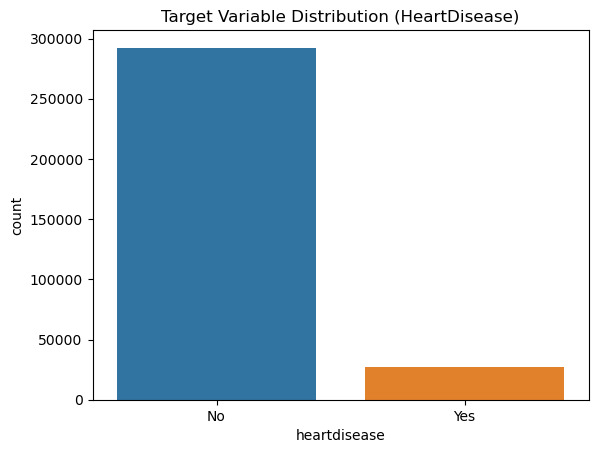


Summary Statistics for Numerical Features:
                 bmi  physicalhealth   mentalhealth      sleeptime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


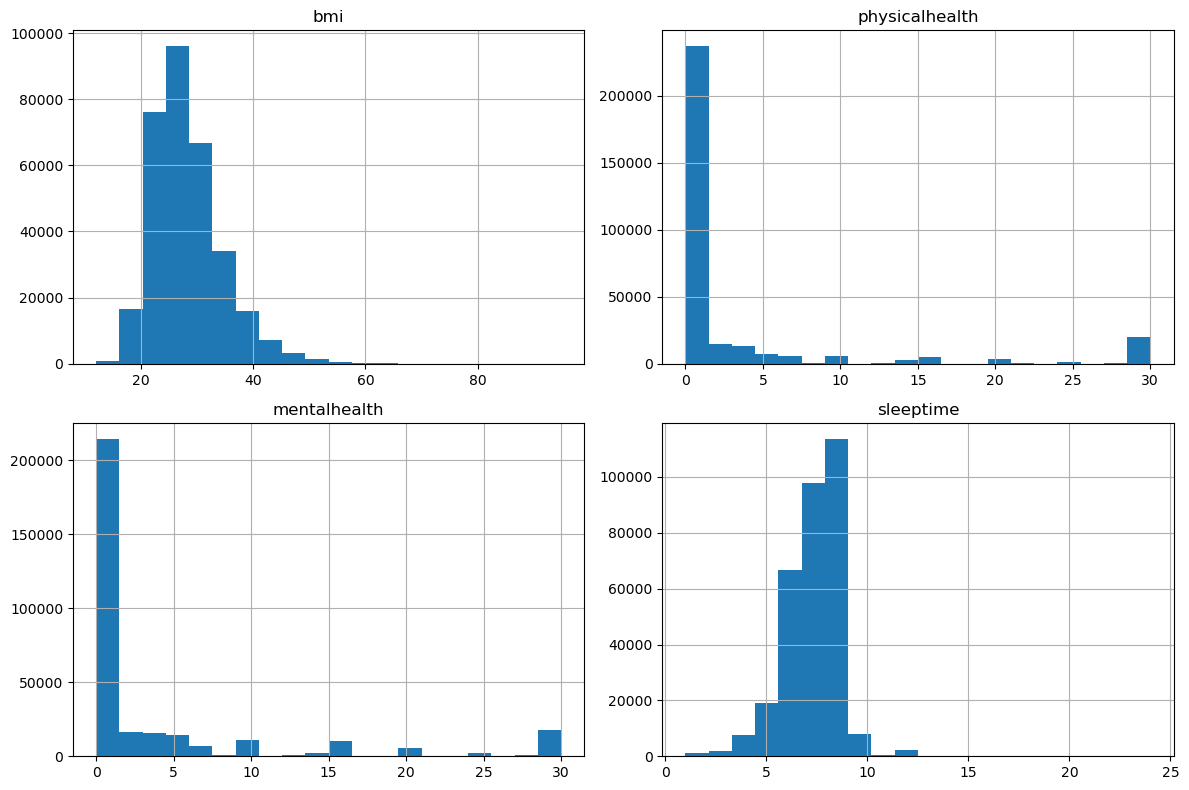

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data['heartdisease'])
plt.title('Target Variable Distribution (HeartDisease)')
plt.show()

numerical_cols = ['bmi', 'physicalhealth', 'mentalhealth', 'sleeptime']
print("\nSummary Statistics for Numerical Features:")
print(data[numerical_cols].describe())

data[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# 5. Bivariate Analysis

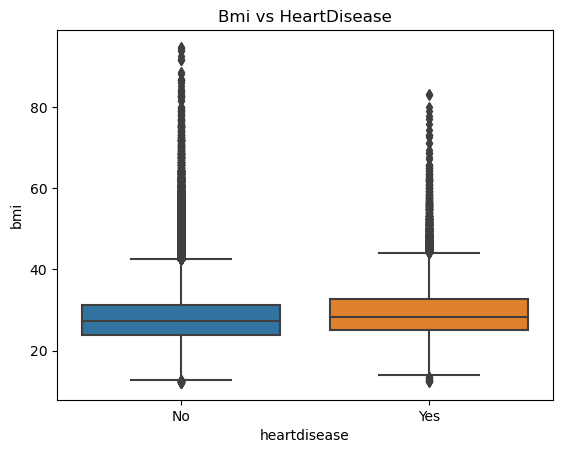

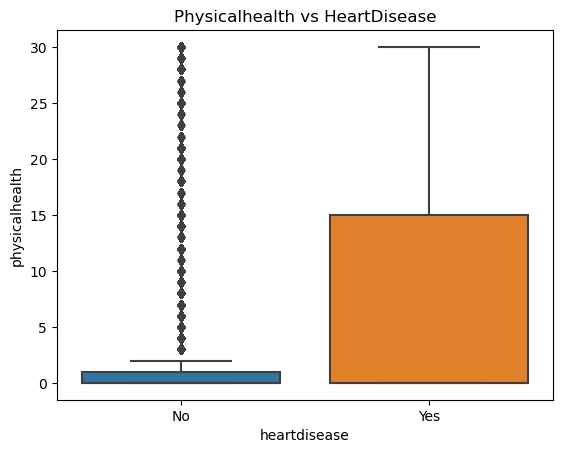

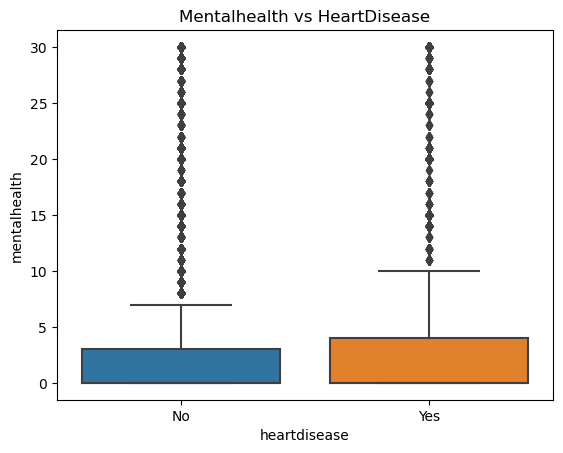

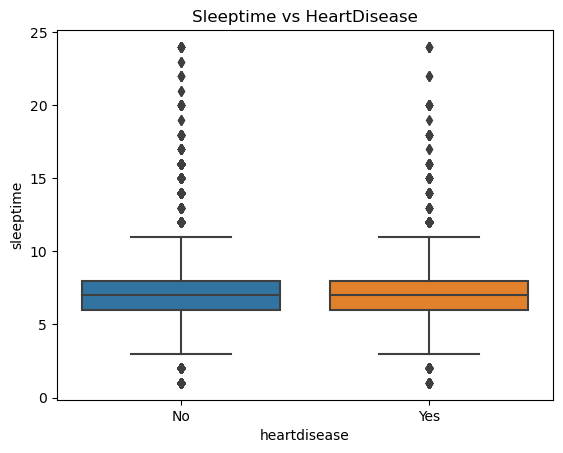

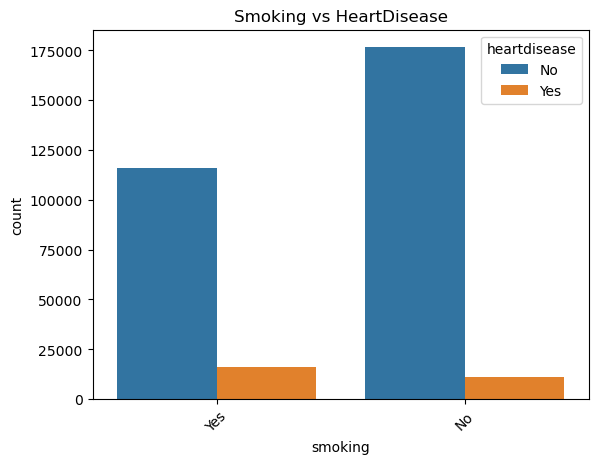

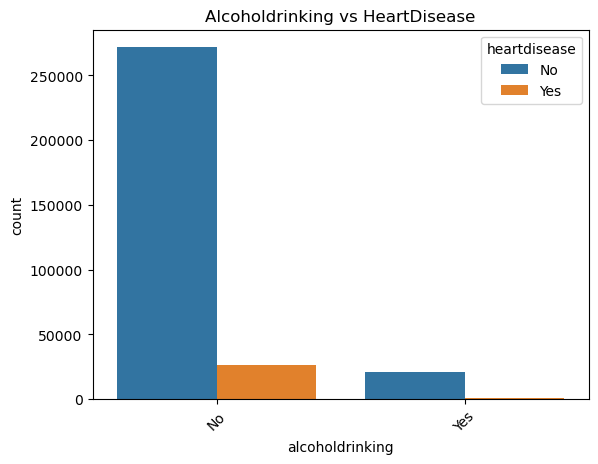

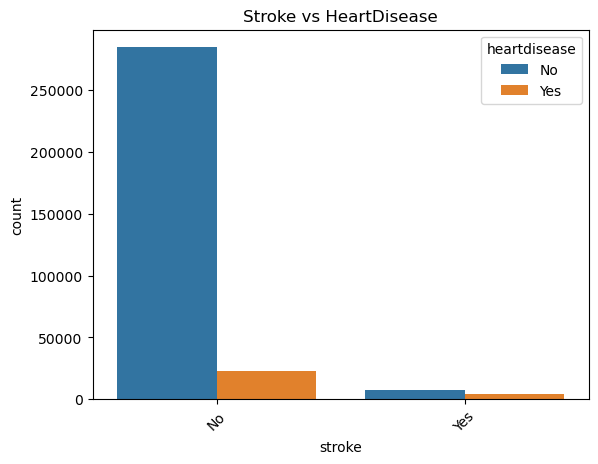

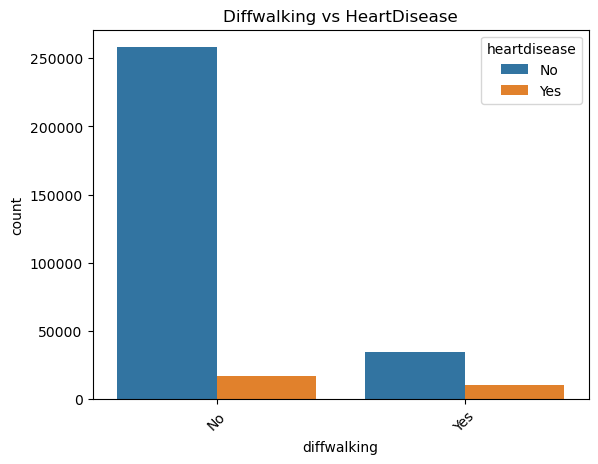

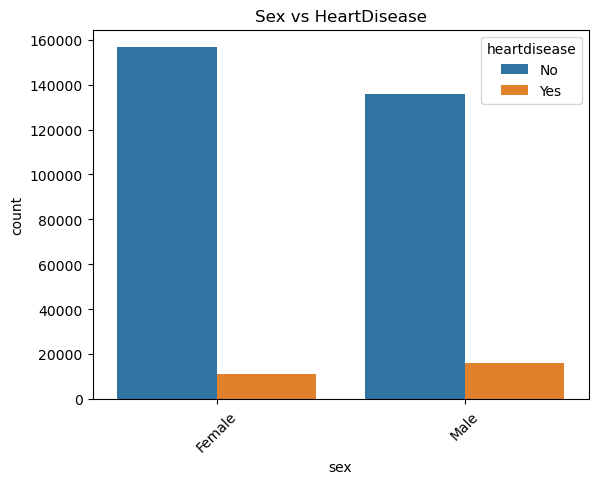

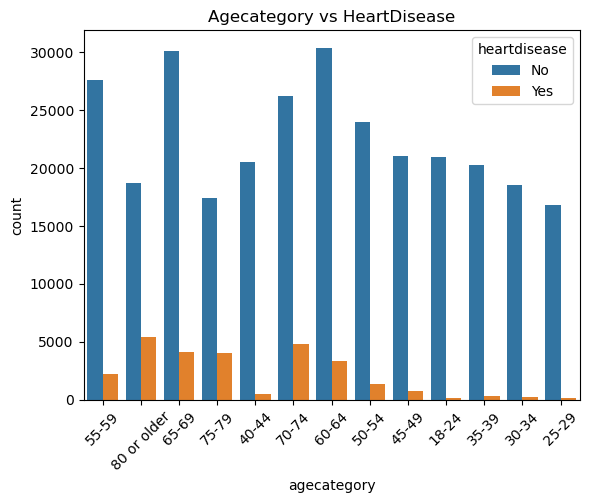

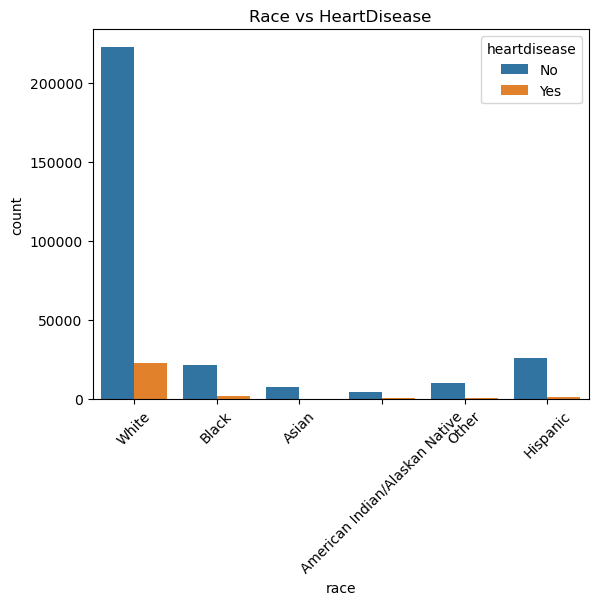

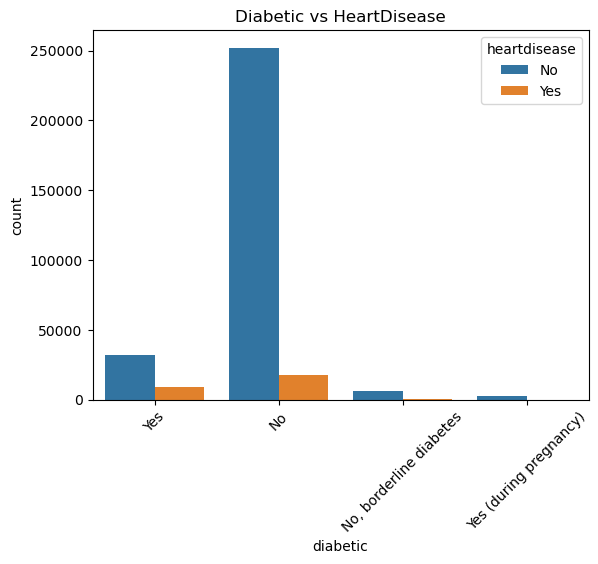

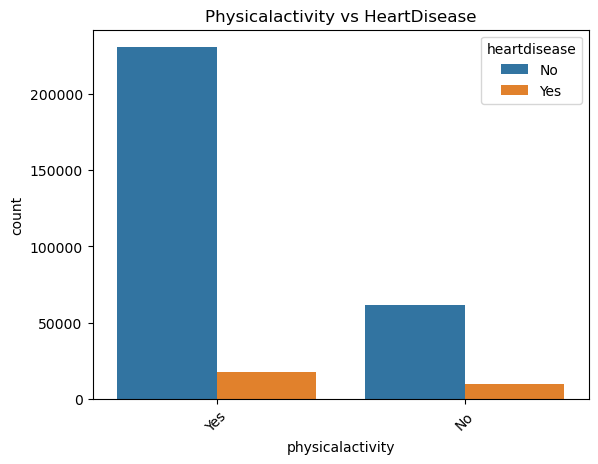

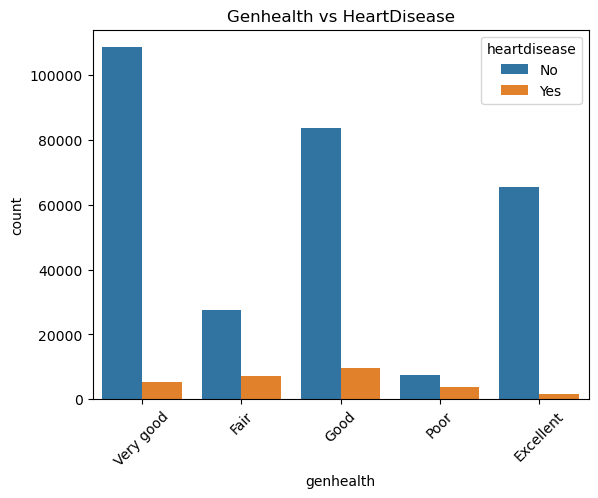

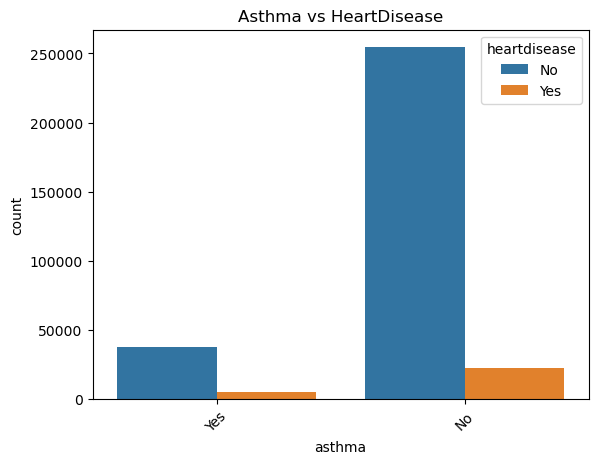

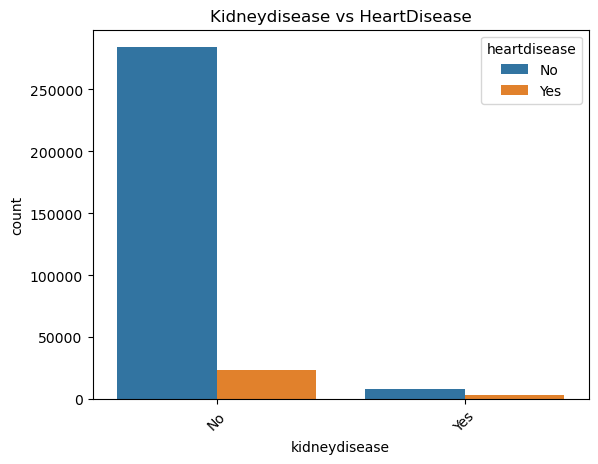

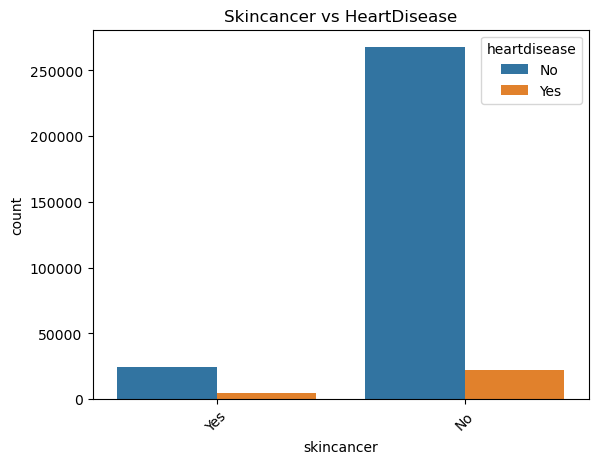

In [ ]:
for col in numerical_cols:
    sns.boxplot(x='heartdisease', y=col, data=data)
    plt.title(f'{col.capitalize()} vs HeartDisease')
    plt.show()

categorical_cols = ['smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'sex',
                    'agecategory', 'race', 'diabetic', 'physicalactivity',
                    'genhealth', 'asthma', 'kidneydisease', 'skincancer']

for col in categorical_cols:
    sns.countplot(x=col, hue='heartdisease', data=data)
    plt.title(f'{col.capitalize()} vs HeartDisease')
    plt.xticks(rotation=45)
    plt.show()

# 6. Multivariate Analysis

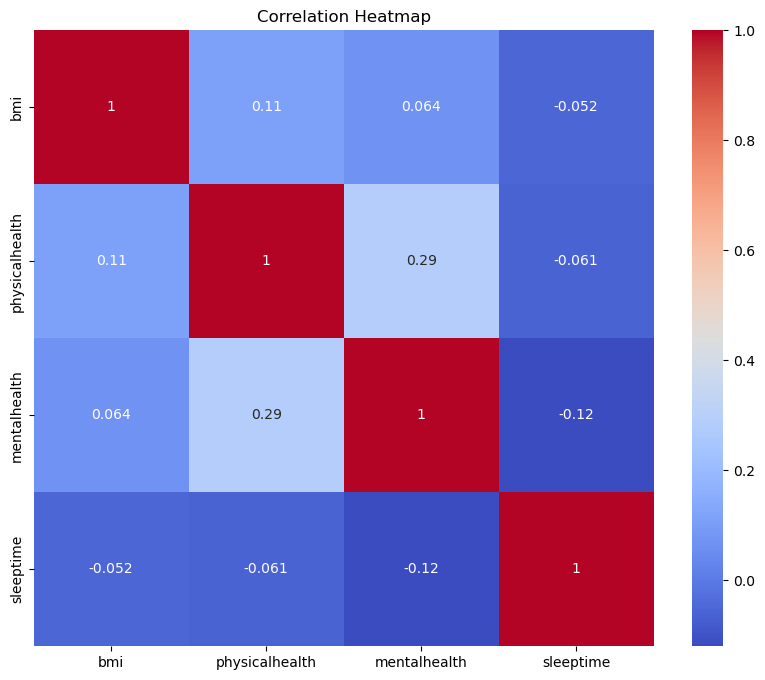

In [ ]:
import numpy as np

plt.figure(figsize=(10, 8))
correlation = data[numerical_cols + ['heartdisease']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 7. Data Preprocessing with ColumnTransformer

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# 8. Model Implementation with KNN Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# 9. Train the KNN Model

In [ ]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bmi', 'physicalhealth',
                                                   'mentalhealth',
                                                   'sleeptime']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['smoking', 'alcoholdrinking',
                                                   'stroke', 'diffwalking',
                                                   'sex', 'agecategory', 'race',
                                                   'diabetic',
                                                   'physicalactivity',
                                                   'genhealth', 'asthma',
                                                   'kidneydisease',
                                

# 10. Convert Target Labels to Numeric

In [ ]:
data['heartdisease'] = data['heartdisease'].map({'No': 0, 'Yes': 1})

print(data['heartdisease'].unique())

[0 1]


# 11. Model Evaluation and Performance Metrics

In [ ]:
y_pred = knn_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.91
Precision: 0.34
Recall: 0.10
F1 Score: 0.16


# 12. Confusion Matrix Visualization

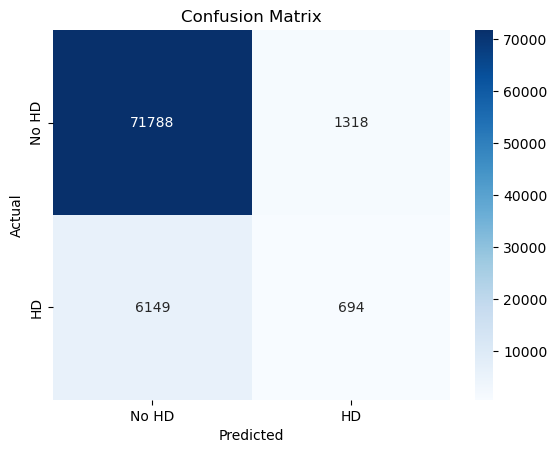

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No HD', 'HD'], yticklabels=['No HD', 'HD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 13. Performance Comparison with Base Paper

In [ ]:
base_paper_accuracy = 0.8614

print(f"Implemented KNN Accuracy: {accuracy:.2f}")
print(f"Base Paper Accuracy: {base_paper_accuracy:.2f}")

if accuracy > base_paper_accuracy:
    print("Our model performed better than the base paper's KNN model.")
else:
    print("Our model's performance is slightly lower than the base paper's KNN model.")

Implemented KNN Accuracy: 0.91
Base Paper Accuracy: 0.86
Our model performed better than the base paper's KNN model.


# Accuracy Comparison

# First convert the Accuracies into Percentages
Implemented KNN Accuracy: 0.91 × 100 = 91.00%

Base Paper Accuracy: 0.86 × 100 = 86.00%
# Final Result
Implemented KNN Accuracy: 91.00%

Base Paper Accuracy: 86.00%

Our implemented KNN model achieved an accuracy of 91.00%, which is higher than the base paper's reported accuracy of 86.14%. This indicates that our preprocessing steps, dataset handling, or model configuration may have contributed to the improved performance. It highlights the effectiveness of our implementation compared to the base paper's results.